<a href="https://colab.research.google.com/github/JUCSERahull337/LayoutParser/blob/master/Copy_of_LayoutParser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -U layoutparser

In [ ]:
pip install layoutparser[ocr]

In [ ]:
pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

In [ ]:
pip install pycocotools

In [ ]:
def load_coco_annotations(annotations, coco=None):
    """
    Args:
        annotations (List):
            a list of coco annotaions for the current image
        coco (`optional`, defaults to `False`):
            COCO annotation object instance. If set, this function will
            convert the loaded annotation category ids to category names
            set in COCO.categories
    """
    layout = lp.Layout()
    for ele in annotations:

        x, y, w, h = ele['bbox']

        layout.append(
            lp.TextBlock(
                block = lp.Rectangle(x, y, w+x, h+y),
                type  = ele['category_id'] if coco is None else coco.cats[ele['category_id']]['name'],
                id = ele['id']
            )
        )

    return layout

In [ ]:
import pandas as pd
import numpy as np
import cv2
import random
import json
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt


from pycocotools.coco import COCO
import layoutparser as lp

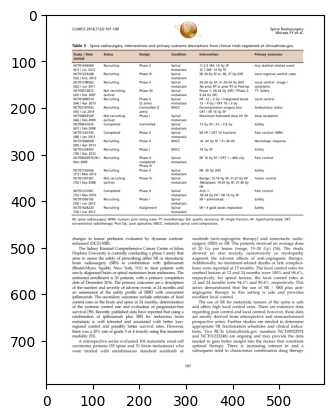

In [ ]:
imgdir="/content/drive/MyDrive/Dataset For Layout Parser/train/train"
image = cv2.imread('/content/drive/MyDrive/Dataset For Layout Parser/train/train/PMC4760359_00006.jpg')
plt.imshow(image)

In [ ]:
f = open('/content/drive/MyDrive/Dataset For Layout Parser/train/train/samples.json',)
thing_classes  = []
category_name_to_id = {}
data_annotations=[]
data = json.load(f)
#----Images----
data_images=data['images']
#---annotations-
for i in data['annotations']:
    annot_obj ={"id": i['id'],"image_id": i['image_id'],"category_id":i['category_id'],
          "x_min":i['bbox'][0], #left
          "y_min":i['bbox'][1], #top
          "x_max":i['bbox'][0]+i['bbox'][2], #left+width
          "y_max":i['bbox'][1]+i['bbox'][3] #top+hieght
         }
    data_annotations.append(annot_obj)
#---categories-
for i in data['categories']:
    thing_classes.append(i['name'])
    category_name_to_id[i['name']]=i['id']
f.close()
print("thing_classes=",thing_classes)
print("category_name_to_id=",category_name_to_id)

thing_classes= ['text', 'title', 'list', 'table', 'figure']
category_name_to_id= {'text': 1, 'title': 2, 'list': 3, 'table': 4, 'figure': 5}


In [ ]:
train_meta = pd.DataFrame(data_images)
train_meta = train_meta[['id', 'file_name', 'width', 'height']]
train_meta = train_meta.rename(columns={"id":"image_id"})
print("train_meta size=",len(train_meta))
train_meta.head(3)


train_meta size= 20


,image_id,file_name,width,height
0,348952,PMC5491943_00004.jpg,596,794
1,384435,PMC5302692_00002.jpg,612,792
2,353156,PMC3863500_00003.jpg,601,792


In [ ]:
train_df = pd.DataFrame(data_annotations)
print("train_df size=",len(train_df))
train_df.head(3)

train_df size= 193


,id,image_id,category_id,x_min,y_min,x_max,y_max
0,3377124,346767,1,37.59,360.34,288.66,401.70
1,3377125,346767,1,37.59,433.64,288.66,454.02
2,3377126,346767,1,306.60,381.37,557.66,422.61


In [ ]:
COCO_ANNO_PATH = '/content/drive/MyDrive/Dataset For Layout Parser/train/train/samples.json'
COCO_IMG_PATH  = '/content/drive/MyDrive/Dataset For Layout Parser/train/train'

coco = COCO(COCO_ANNO_PATH)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


New Version

In [ ]:
from pycocotools.coco import COCO

# Your JSON annotation file path
COCO_ANNO_PATH = '/content/drive/MyDrive/Dataset For Layout Parser/train/train/samples.json'
COCO_IMG_PATH = '/content/drive/MyDrive/Dataset For Layout Parser/train/train'
image_path = '/content/drive/MyDrive/Dataset For Layout Parser/train/train/PMC4760359_00006.jpg'

# Load the COCO dataset
coco = COCO(COCO_ANNO_PATH)

# Get the filename from the provided image_path
image_filename = image_path.split('/')[-1]

# Find the image_id for the given image_path
image_id = None
for img_id, img_info in coco.imgs.items():
    if img_info['file_name'] == image_filename:
        image_id = img_id
        break

# Check if the image_id was found
if image_id is not None:
    print("Image ID for the given image:", image_id)
else:
    print("Image ID not found for the given image.")


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Image ID for the given image: 417386


Image ID for the given image: 417386


AttributeError: ignored

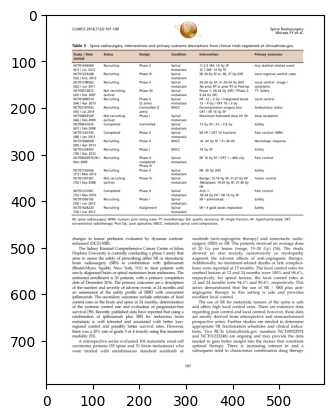

In [ ]:

color_map = {
    'text': 'red',
    'title': 'blue',
    'list': 'green',
    'table': 'yellow',
    'figure': 'pink',
}

# Load the image using cv2
image = cv2.imread(image_path)
plt.imshow(image)

# Get the filename from the provided image_path
image_filename = image_path.split('/')[-1]

# Find the image_id for the given image_path
image_id = None
for img_id, img_info in coco.imgs.items():
    if img_info['file_name'] == image_filename:
        image_id = img_id
        break

if image_id is not None:
    print("Image ID for the given image:", image_id)

    # Load annotations for the specified image_id
    annotations = coco.loadAnns(coco.getAnnIds([image_id]))

    # Process annotations and visualize the layout
    layout = lp.load_coco_annotations(annotations, coco)
    viz = lp.draw_box(image, layout, color_map=color_map)
    display(viz)  # show the results
else:
    print("Image ID not found for the given image.")


Old Version

<ipython-input-55-284ca5cf04bf>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  for image_id in random.sample(coco.imgs.keys(), 1):


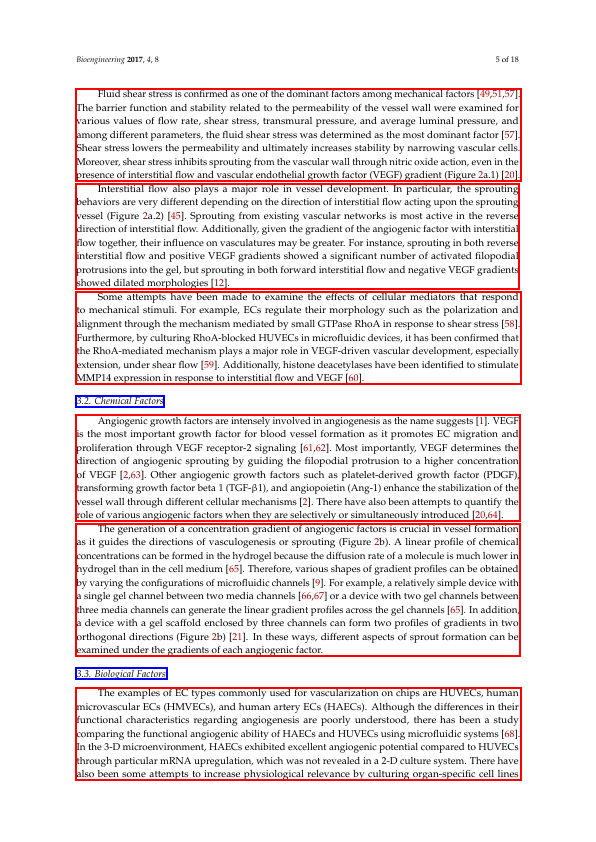

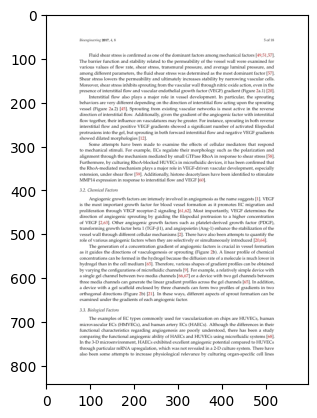

In [ ]:
color_map = {
    'text':   'red',
    'title':  'blue',
    'list':   'green',
    'table':  'yellow',
    'figure': 'pink',
}


for image_id in random.sample(coco.imgs.keys(), 1):
    image_info = coco.imgs[image_id]
    annotations = coco.loadAnns(coco.getAnnIds([image_id]))

    image = cv2.imread(f'{COCO_IMG_PATH}/{image_info["file_name"]}')
    plt.imshow(image)
    layout = load_coco_annotations(annotations, coco)

    viz = lp.draw_box(image, layout, color_map=color_map)
    display(viz) # show the results

In [ ]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "text", 1: "title", 2: "list", 3:"table", 4:"figure"})

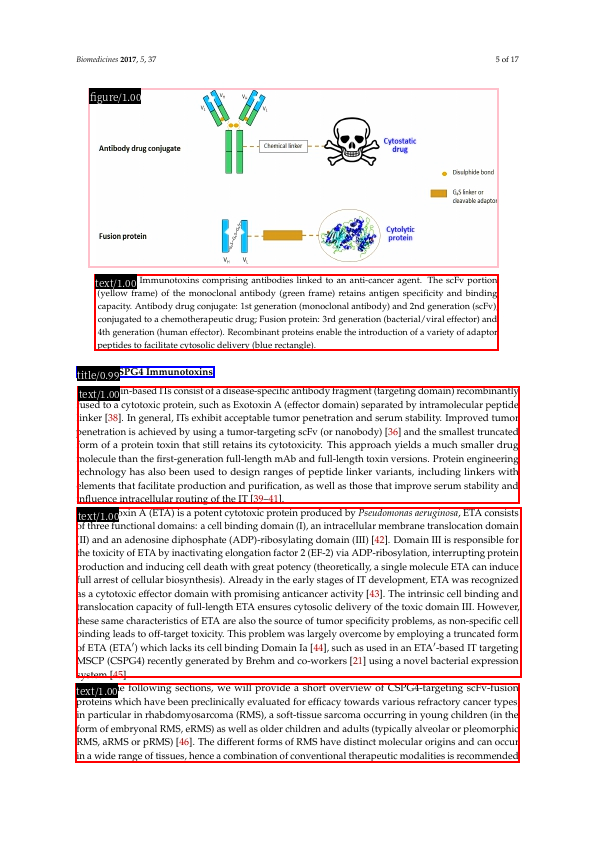

In [ ]:
layout_predicted = model.detect(image)
lp.draw_box(image,
              [b.set(id=f'{b.type}/{b.score:.2f}') for b in layout_predicted],
              color_map=color_map,
              show_element_id=True, id_font_size=10,
              id_text_background_color='black',
              id_text_color='white')